# Time Series Data Preparation Lesson

08 February 2023

1. Acquire the data
2. Convert the date column to datetime
3. Set the datetime column as the index

In [4]:
import pandas as pd
import numpy as np

from wrangle import acquire_store

import env

from datetime import timedelta, datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire_store()

In [3]:
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


## Convert date col to 'datetime'

Joyeux Pâques  

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

'infer_datetime_format' : if T and no format given, function will attempt to infer the format of the dt strings. If possible to be inferred, running of the function will be sped up significantly. Thus, indicate 'True'.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.8+ MB


In [6]:
# change 'sale_date' to datetime format

pd.to_datetime(df['sale_date'])

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

In [7]:
# setting sale_date col

df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format = True)

In [8]:
df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode            object
dtype: object

In [11]:
# setting index to now-date-formated 'sale_date'

df = df.set_index('sale_date')

In [14]:
df.head(3)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [16]:
# get most-recent dates at the top

df = df.sort_index()

In [19]:
df.head(3)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217


In [22]:
# investigate No of unique entries in each col

cols_inv = ['item_brand', 'item_name', 'store_address']

for col in cols_inv:
    
    # investigate No of unique entries in each col
    qie = df[col].nunique()
    
    print(f'There are {qie} unique values in the {col} column.')

There are 49 unique values in the item_brand column.
There are 50 unique values in the item_name column.
There are 10 unique values in the store_address column.


In [23]:
# see date range of df

df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [24]:
df.index.min() - df.index.max()

Timedelta('-1825 days +00:00:00')

In [26]:
# seeing how many days data was captured

df.index.nunique()

1826

In [27]:
# Which brand has +1 item ?

df.groupby(['item_brand', 'item_name']).count()

# counts of the occurence of each cobination

,,sale_amount,item_price,store_address,store_zipcode
item_brand,item_name,,,,
Ahold,Ahold Cocoa Almonds,18260,18260,18260,18260
Amys,Amys Light & Lean Spaghetti Italiano,18260,18260,18260,18260
Back To Nature,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,18260,18260,18260,18260
Barefoot,Barefoot Pinot Grigio 187,18260,18260,18260,18260
Bear Naked,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,18260,18260,18260,18260
Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk,18260,18260,18260,18260
Boars Head,Boars Head Sliced White American Cheese - 120 Ct,18260,18260,18260,18260
Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,18260,18260,18260,18260
Careone,Careone Family Comb Set - 8 Ct,18260,18260,18260,18260


In [31]:
# Which brand has +1 item ?

df.groupby(['item_brand', 'item_name']).count().sort_values(by = 'item_name')

# USDA Produce has 2 entries

,,sale_amount,item_price,store_address,store_zipcode
item_brand,item_name,,,,
Ahold,Ahold Cocoa Almonds,18260,18260,18260,18260
Amys,Amys Light & Lean Spaghetti Italiano,18260,18260,18260,18260
Back To Nature,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,18260,18260,18260,18260
Barefoot,Barefoot Pinot Grigio 187,18260,18260,18260,18260
Bear Naked,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,18260,18260,18260,18260
Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk,18260,18260,18260,18260
Boars Head,Boars Head Sliced White American Cheese - 120 Ct,18260,18260,18260,18260
Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,18260,18260,18260,18260
Careone,Careone Family Comb Set - 8 Ct,18260,18260,18260,18260


<AxesSubplot:xlabel='sale_date'>

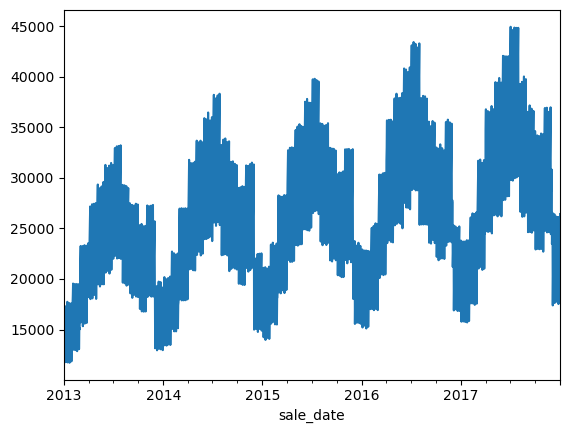

In [35]:
# looking at sales amount based on sales 

df.groupby('sale_date')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

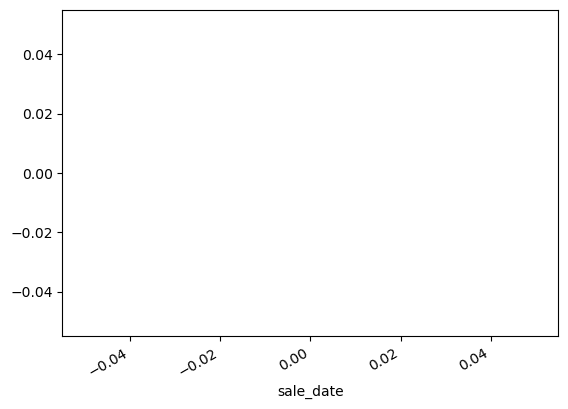

In [60]:
# plotting zipcode sale_date sale_amount

df[df['store_zipcode'] == 78253].groupby('sale_date')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

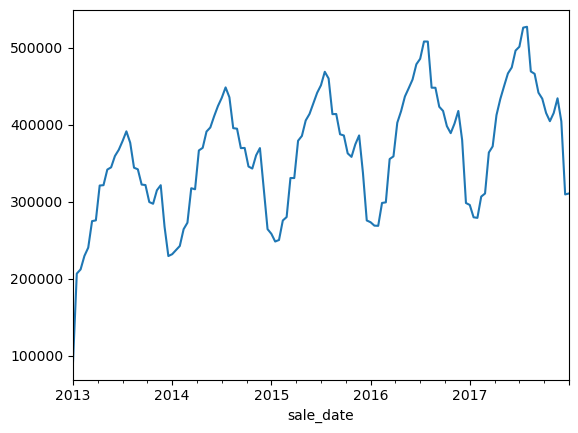

In [67]:
# p;otting sale amount by month

df.resample('2w')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

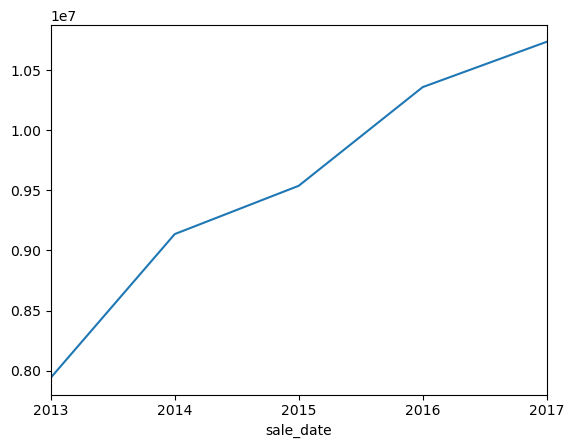

In [52]:
# resample by year

df.resample('y')['sale_amount'].sum().plot()